# Alpaca-py stock trading basic

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alpacahq/alpaca-py/blob/master/examples/stocks-trading-basic.ipynb)

- This notebook shows how to use alpaca-py with stock trading API endpoints
- Please use ``paper account``. Please ``DO NOT`` use this notebook with live account. In this notebook, we place orders for stocks as an example.

In [9]:
# Please change the following to your own PAPER api key and secret
# You can get them from https://alpaca.markets/

api_key = "PKZICWJP41JA0S54HOC8"
secret_key = "LKi8DyIl5lH0yFE8ZBc3j0rKJ8KhMu7RLBNQnAOo"

#### We use paper environment for this example ####
paper = True # Please do not modify this. This example is for paper trading only.
####

# Below are the variables for development this documents
# Please do not change these variables
trade_api_url = None
trade_api_wss = None
data_api_url = None
stream_data_wss = None

In [ ]:
# install alpaca-py, yfinance, mplfinance
! python3 -m pip install alpaca-py yfinance mplfinance vectorbt

In [12]:
# We use paper environment for this example
paper = True
# Install / Import necessary packages
# ! python3 -m pip install alpaca-py

import alpaca
from alpaca.trading.client import TradingClient
import json
from datetime import datetime, timedelta
from zoneinfo import ZoneInfo
from alpaca.trading.requests import (MarketOrderRequest, GetOrdersRequest)
from alpaca.trading.enums import (OrderSide, OrderType,TimeInForce, QueryOrderStatus)

trade_client = TradingClient(api_key=api_key, secret_key=secret_key, paper=paper, url_override=trade_api_url)


In [8]:
req = MarketOrderRequest(
    symbol = 'AMZN241025P00190000',
    qty = 1,
    side = OrderSide.BUY,
    type = OrderType.MARKET,
    time_in_force = TimeInForce.DAY,
)
res = trade_client.submit_order(req)
res

{   'asset_class': <AssetClass.US_OPTION: 'us_option'>,
    'asset_id': UUID('f92a6e80-189c-4881-9549-fe5dad585df4'),
    'canceled_at': None,
    'client_order_id': '66a59759-1171-447a-99ad-1527dd1cb1cb',
    'created_at': datetime.datetime(2024, 10, 23, 18, 22, 58, 790815, tzinfo=TzInfo(UTC)),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('ba97b41c-ee39-4869-b1a7-de5a39ea2696'),
    'legs': None,
    'limit_price': None,
    'notional': None,
    'order_class': <OrderClass.SIMPLE: 'simple'>,
    'order_type': <OrderType.MARKET: 'market'>,
    'qty': '1',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': <OrderSide.BUY: 'buy'>,
    'status': <OrderStatus.PENDING_NEW: 'pending_new'>,
    'stop_price': None,
    'submitted_at': datetime.datetime(2024, 10, 23, 18, 22, 58, 751020, tzinfo=TzInfo(UTC)),
    'symbol': 'AMZ

In [15]:
req = GetOrdersRequest(
    status = QueryOrderStatus.ALL,
    symbols = ["AMZN241025C00190000"],
    limit = 2,
)
orders = trade_client.get_orders(req)
orders

[]

In [ ]:
import json
from datetime import datetime, timedelta
from zoneinfo import ZoneInfo

import alpaca
from alpaca.trading.client import TradingClient
from alpaca.data.timeframe import TimeFrame, TimeFrameUnit
from alpaca.data.historical.stock import StockHistoricalDataClient
from alpaca.trading.stream import TradingStream
from alpaca.data.live.stock import StockDataStream

from alpaca.data.requests import (
    StockBarsRequest,
    StockTradesRequest,
    StockQuotesRequest
)
from alpaca.trading.requests import (
    GetAssetsRequest,
    MarketOrderRequest,
    LimitOrderRequest,
    StopOrderRequest,
    StopLimitOrderRequest,
    TakeProfitRequest,
    StopLossRequest,
    TrailingStopOrderRequest,
    GetOrdersRequest,
    ClosePositionRequest
)
from alpaca.trading.enums import (
    AssetStatus,
    AssetExchange,
    OrderSide,
    OrderType,
    TimeInForce,
    OrderClass,
    QueryOrderStatus
)
from alpaca.common.exceptions import APIError

In [ ]:
# to run async code in jupyter notebook
import nest_asyncio
nest_asyncio.apply()

In [ ]:
# check version of alpaca-py
alpaca.__version__

'0.31.0'

# Random

In [ ]:
# import the necessary packages
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
import pandas as pd
import yfinance as yf


In [ ]:
# Fetch TSLA stock data
tsla = yf.Ticker("TSLA")

# Retrieve available option expiration dates
expiration_dates = tsla.options
print("Available Expiration Dates:", expiration_dates)

# Choose an expiration date to analyze
expiration = expiration_dates[0]

# Retrieve option chain data for the selected expiration date
options_chain = tsla.option_chain(expiration)

# Separate calls and puts data
calls = options_chain.calls
puts = options_chain.puts

# Display the first few rows of calls and puts data
print(calls.head())
print(puts.head())

Available Expiration Dates: ('2024-10-25', '2024-11-01', '2024-11-08', '2024-11-15', '2024-11-22', '2024-11-29', '2024-12-20', '2025-01-17', '2025-02-21', '2025-03-21', '2025-04-17', '2025-05-16', '2025-06-20', '2025-08-15', '2025-09-19', '2025-12-19', '2026-01-16', '2026-06-18', '2026-12-18', '2027-01-15')
        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  TSLA241025C00075000 2024-10-21 15:42:34+00:00    75.0     143.24  142.15   
1  TSLA241025C00080000 2024-09-18 14:53:01+00:00    80.0     149.60  140.45   
2  TSLA241025C00090000 2024-10-18 13:52:54+00:00    90.0     131.26  127.30   
3  TSLA241025C00095000 2024-10-18 13:30:01+00:00    95.0     126.22  120.75   
4  TSLA241025C00100000 2024-10-22 13:30:05+00:00   100.0     117.27  117.45   

      ask    change  percentChange  volume  openInterest  impliedVolatility  \
0  143.95  0.000000       0.000000     8.0            27           3.945313   
1  141.20  0.000000       0.000000     NaN             0  

In [ ]:
# Initialize the Alpaca client
api_key = "PKZICWJP41JA0S54HOC8"
secret_key = "LKi8DyIl5lH0yFE8ZBc3j0rKJ8KhMu7RLBNQnAOo"
client = StockHistoricalDataClient(api_key, secret_key)

# Define the request for historical data
request_params = StockBarsRequest(
    symbol_or_symbols="TSLA",
    timeframe=TimeFrame.Day,
    start="2024-09-17",  # Adjust the date range as needed
    end="2024-10-17"
)
tsla_data = client.get_stock_bars(request_params).df


# Reset index of the dataframe
tsla_data.reset_index(inplace=True)

# Extract daily high (max) and low (min) prices
tsla_daily_max_min = tsla_data[['high', 'low']]

# Print the first few rows to see the data
print(tsla_daily_max_min.head())

     high       low
0  234.57  226.5533
1  235.68  226.8800
2  244.24  232.1300
3  243.99  235.9200
4  250.00  241.9200


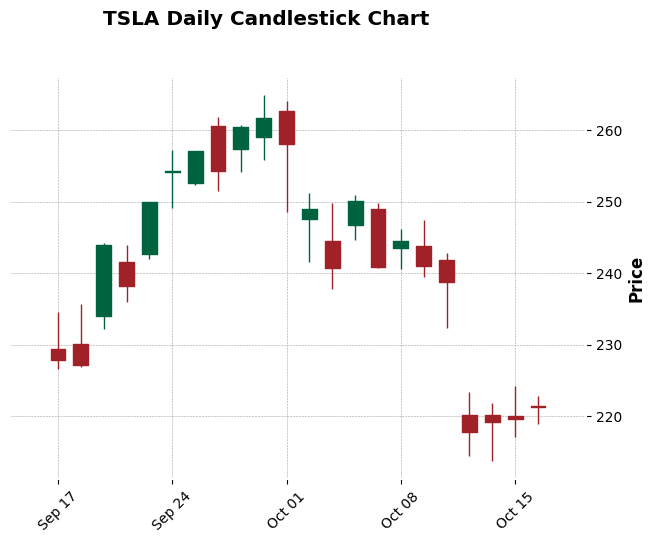

In [ ]:
# Ensure 'timestamp' is in datetime format
tsla_data['timestamp'] = pd.to_datetime(tsla_data['timestamp'])

# Set 'timestamp' as the index (required for mplfinance)
tsla_data.set_index('timestamp', inplace=True)

# Prepare the data for the candlestick chart
# The required columns are 'Open', 'High', 'Low', 'Close'
candlestick_data = tsla_data[['open', 'high', 'low', 'close']]

# Plot the candlestick chart
mpf.plot(candlestick_data, type='candle', style='charles', title='TSLA Daily Candlestick Chart', ylabel='Price')

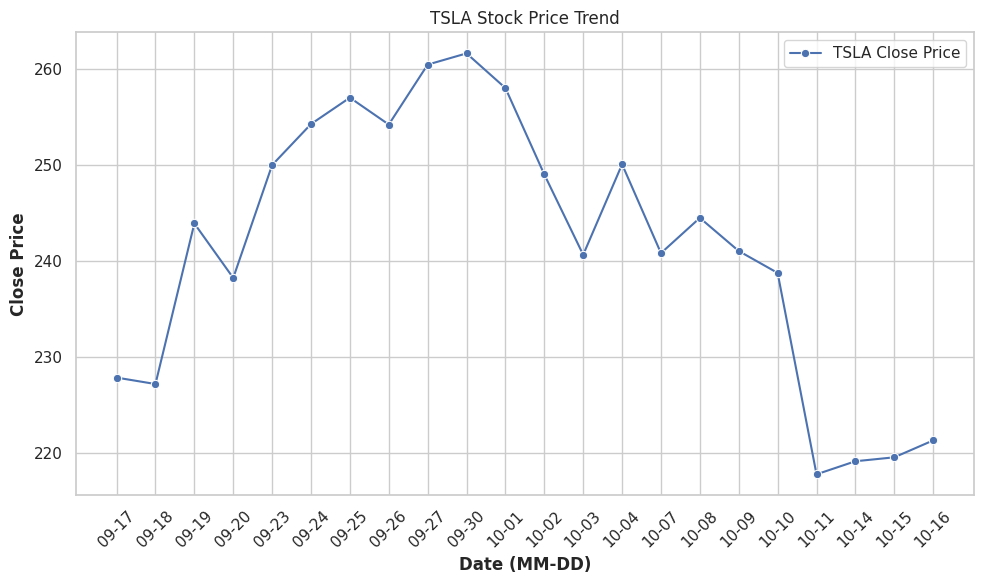

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a seaborn style
sns.set(style="whitegrid")

# Sample visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=tsla_data, x='month_day', y='close', marker='o', label='TSLA Close Price')

# Customize the plot
plt.xlabel('Date (MM-DD)')
plt.ylabel('Close Price')
plt.title('TSLA Stock Price Trend')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [ ]:
# setup clients
trading_client = TradingClient(api_key=api_key, secret_key=secret_key, paper=paper, url_override=trade_api_url)

# Going long on SPY
# limit_order_data = LimitOrderRequest(symbol = "SPY",
#                                      limit_price = 584,
#                                      qty = 100,
#                                      side = OrderSide.BUY,
#                                      time_in_force = TimeInForce.DAY)
# limit_order = trading_client.submit_order(order_data = limit_order_data)

In [ ]:
# Place an order to sell call options on SPY.
call_order_data = LimitOrderRequest(symbol = "SPY241101C00590000",
                                    limit_price = 4.10,
                                    qty = 1,
                                    side = OrderSide.SELL,
                                    time_in_force = TimeInForce.DAY)
call_order = trading_client.submit_order(order_data = call_order_data)

In [ ]:
put_order_data = LimitOrderRequest(symbol = "TSLA241025P00210000",
                                    limit_price = 4.70,
                                    qty = 1,
                                    side = OrderSide.BUY,
                                    time_in_force = TimeInForce.DAY)
call_order = trading_client.submit_order(order_data = put_order_data)

In [ ]:
import numpy as np
import vectorbt as vbt
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Initialize the Alpaca client
client = StockHistoricalDataClient(api_key, secret_key)

# Input settings (aligning with Pine Script inputs)
stock_quantity = 100
call_premium = 2.5  # Premium per contract
strike_price = 225  # Strike price for the call option
expiry_days = 30  # Days until expiry

# Fetch historical data (adjust ticker and date range as needed)
request_params = StockBarsRequest(
    symbol_or_symbols=["TSLA"],
    timeframe=TimeFrame.Day,
    start=datetime(2023, 1, 1),
    end=datetime(2023, 12, 31)
)
tsla_data = client.get_stock_bars(request_params).df
close_prices = tsla_data['close']

# Entry: Buy the stock at the beginning
entries = np.full(close_prices.shape, False)
entries[0] = True  # Buy stock at the beginning

# Exit Condition: If the stock price rises above the strike price
def calculate_exit_profit(current_close):
    call_value = (current_close - strike_price) * stock_quantity / 100
    if current_close > strike_price:
        # Simulate assignment of the covered call (stock is sold)
        return call_value + call_premium * stock_quantity / 100
    else:
        # Profit from collecting the premium without assignment
        return call_premium * stock_quantity / 100

# Generate exit signals
exit_profits = close_prices.apply(calculate_exit_profit)

# Determine if a covered call should be assigned or if we should just keep the premium
exits = close_prices > strike_price

# Implementing the VectorBT portfolio
pf = vbt.Portfolio.from_signals(
    close=close_prices,
    entries=entries,
    exits=exits,
    size=stock_quantity,  # Quantity of shares being traded
    fees=0,  # Assume no transaction fees for simplicity
    freq='1D',
    accumulate=False  # Do not accumulate more shares, keep it simple
)

# Display stats and plot results
print(pf.stats())
# pf.plot().show()

import plotly.express as px

# Generate the plotly figure from VectorBT
fig = pf.plot()

# Hide the x-axis
fig.update_xaxes(visible=False)

# Show the adjusted plot
fig.show()


Start                         (TSLA, 2023-01-03 05:00:00+00:00)
End                           (TSLA, 2023-12-29 05:00:00+00:00)
Period                                        250 days 00:00:00
Start Value                                               100.0
End Value                                            217.261795
Total Return [%]                                     117.261795
Benchmark Return [%]                                  129.86124
Max Gross Exposure [%]                                    100.0
Total Fees Paid                                             0.0
Max Drawdown [%]                                       28.23469
Max Drawdown Duration                          74 days 00:00:00
Total Trades                                                  1
Total Closed Trades                                           1
Total Open Trades                                             0
Open Trade PnL                                              0.0
Win Rate [%]                            

In [ ]:
import numpy as np
import vectorbt as vbt
import yfinance as yf

# Fetch historical data for TSLA
data = yf.download("TSLA", start="2023-02-01", end="2024-02-29")
close_prices = data['Close']

# Input settings
stock_quantity = 100
put_cost_per_contract = 2.5
strike_price = 225

# Initialize VectorBT Portfolio
# Simulate buying 100 shares of the stock at the beginning
entries = np.full(close_prices.shape, False)
entries[0] = True  # Buy stock at the beginning

# Simulate Protective Put Strategy
put_cost = put_cost_per_contract * stock_quantity / 100

# Define exit logic
def calculate_exit_profit(current_close):
    put_value = (strike_price - current_close) * stock_quantity / 100
    # Make sure protective puts are activated correctly and exit if needed
    return put_value - (put_cost_per_contract * stock_quantity / 100) if current_close < strike_price else 0

# Create exit signals (based on strike price and put cost)
exit_profits = close_prices.apply(calculate_exit_profit)

# Determine if a protective put should be activated
exits = close_prices < strike_price

# Create the Portfolio using VectorBT
pf = vbt.Portfolio.from_signals(
    close=close_prices,
    entries=entries,
    exits=exits,
    size=stock_quantity,
    fees=put_cost_per_contract / 100 * stock_quantity,  # Adjust fee structure
    freq='1D',
    accumulate=False  # Consider setting this to False to prevent excessive exposure
)

# Analyze the result
print(pf.stats())
pf.plot().show()


[*********************100%***********************]  1 of 1 completed


Start                         2023-02-01 00:00:00
End                           2024-02-28 00:00:00
Period                          270 days 00:00:00
Start Value                                 100.0
End Value                                   100.0
Total Return [%]                              0.0
Benchmark Return [%]                    11.372024
Max Gross Exposure [%]                        0.0
Total Fees Paid                               0.0
Max Drawdown [%]                              NaN
Max Drawdown Duration                         NaT
Total Trades                                    0
Total Closed Trades                             0
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


# Trading Client

In [ ]:
# setup clients
trade_client = TradingClient(api_key=api_key, secret_key=secret_key, paper=paper, url_override=trade_api_url)

In [ ]:
# check trading account
# You can check definition of each field in the following documents
# ref. https://docs.alpaca.markets/docs/account-plans
# ref. https://docs.alpaca.markets/reference/getaccount-1
acct = trade_client.get_account()
acct

{   'account_blocked': False,
    'account_number': 'PA3P9DF5CZ5G',
    'accrued_fees': '0',
    'buying_power': '117603.79',
    'cash': '18465.74',
    'created_at': datetime.datetime(2024, 5, 15, 18, 59, 39, 40242, tzinfo=TzInfo(UTC)),
    'crypto_status': <AccountStatus.ACTIVE: 'ACTIVE'>,
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'equity': '99548.05',
    'id': UUID('8124b3d1-e06e-4212-8930-0f9b5f69c050'),
    'initial_margin': '40746.16',
    'last_equity': '99800.46',
    'last_maintenance_margin': '26447.9',
    'long_market_value': '81082.31',
    'maintenance_margin': '26789.39',
    'multiplier': '2',
    'non_marginable_buying_power': '56801.89',
    'options_approved_level': 2,
    'options_buying_power': '72758.65',
    'options_trading_level': 2,
    'pattern_day_trader': False,
    'pending_transfer_in': None,
    'pending_transfer_out': None,
    'portfolio_value': '99548.05',
    'regt_buying_power': '117603.79',
    'short

In [ ]:
# check account configuration
# ref. https://docs.alpaca.markets/reference/getaccountconfig-1
acct_config = trade_client.get_account_configurations()
acct_config

{   'dtbp_check': <DTBPCheck.ENTRY: 'entry'>,
    'fractional_trading': True,
    'max_margin_multiplier': '4',
    'max_options_trading_level': None,
    'no_shorting': False,
    'pdt_check': <PDTCheck.ENTRY: 'entry'>,
    'ptp_no_exception_entry': False,
    'suspend_trade': False,
    'trade_confirm_email': <TradeConfirmationEmail.ALL: 'all'>}

In [ ]:
# set account configuration
# ref. https://docs.alpaca.markets/reference/patchaccountconfig-1
req = acct_config
req.fractional_trading = not req.fractional_trading # toggle fractional trading
acct_config_new = trade_client.set_account_configurations(req)
display(acct_config_new)

# revert changes
req = acct_config_new
req.fractional_trading = not req.fractional_trading # toggle fractional trading
acct_config_reverted = trade_client.set_account_configurations(req)
display(acct_config_reverted)

{   'dtbp_check': <DTBPCheck.ENTRY: 'entry'>,
    'fractional_trading': False,
    'max_margin_multiplier': '4',
    'max_options_trading_level': None,
    'no_shorting': False,
    'pdt_check': <PDTCheck.ENTRY: 'entry'>,
    'ptp_no_exception_entry': False,
    'suspend_trade': False,
    'trade_confirm_email': <TradeConfirmationEmail.ALL: 'all'>}

{   'dtbp_check': <DTBPCheck.ENTRY: 'entry'>,
    'fractional_trading': True,
    'max_margin_multiplier': '4',
    'max_options_trading_level': None,
    'no_shorting': False,
    'pdt_check': <PDTCheck.ENTRY: 'entry'>,
    'ptp_no_exception_entry': False,
    'suspend_trade': False,
    'trade_confirm_email': <TradeConfirmationEmail.ALL: 'all'>}

In [ ]:
# get list of assets which are us_equity (default), active, and in NASDAQ
# ref. https://docs.alpaca.markets/reference/get-v2-assets-1
req = GetAssetsRequest(
  # asset_class=AssetClass.US_EQUITY,  # default asset_class is us_equity
  status=AssetStatus.ACTIVE,
  exchange=AssetExchange.NASDAQ,
)
assets = trade_client.get_all_assets(req)
assets[:2]

[{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
     'attributes': [],
     'easy_to_borrow': False,
     'exchange': <AssetExchange.NASDAQ: 'NASDAQ'>,
     'fractionable': False,
     'id': UUID('db09952f-8b21-4a9a-9429-e5ad346a0fdc'),
     'maintenance_margin_requirement': 100.0,
     'marginable': False,
     'min_order_size': None,
     'min_trade_increment': None,
     'name': 'Akanda Corp. Common Shares',
     'price_increment': None,
     'shortable': False,
     'status': <AssetStatus.ACTIVE: 'active'>,
     'symbol': 'AKAN',
     'tradable': False},
 {   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
     'attributes': [],
     'easy_to_borrow': False,
     'exchange': <AssetExchange.NASDAQ: 'NASDAQ'>,
     'fractionable': False,
     'id': UUID('0aa98381-dc6f-4cf7-bd9c-4acf9c78f15c'),
     'maintenance_margin_requirement': 100.0,
     'marginable': False,
     'min_order_size': None,
     'min_trade_increment': None,
     'name': 'Shuttle Pharmaceuticals Holding

### Orders

In [ ]:
# we will place orders which Alapca trading platform supports
# - order classes: simple, bracket, oco, oto
# - order types: market, limit, stop, stop_limit, trailing_stop
#
# please refer to the following documents for more details
# ref. https://docs.alpaca.markets/docs/orders-at-alpaca
# ref. https://docs.alpaca.markets/reference/postorder
#
# we will also use fractional trading capability of Alpaca trading platform in this example
# ref. https://docs.alpaca.markets/docs/fractional-trading

# we will place orders for symbol: SPY in this example
symbol = "SPY"

In [ ]:
# simple, market order, fractional qty
# Alpaca trading platform support fractional trading by default
# you can specify:
# fractional qty (e.g. 0.01 qty) in the order request (which is shown in this example)
# or notional value (e.g. 100 USD) (which is in the next example)
#
# If you have an error of `qty must be integer`,
# please try to `Reset Account` of your paper account via the Alpaca Trading API dashboard
req = MarketOrderRequest(
    symbol = symbol,
    qty = 5.5,
    side = OrderSide.BUY,
    type = OrderType.MARKET,
    time_in_force = TimeInForce.DAY,
)
res = trade_client.submit_order(req)
res

In [ ]:
# simple, market order, notional
# Alpaca trading platform support fractional trading by default
# you can specify:
# fractional qty (e.g. 0.01 qty) in the order request (which is in the example above)
# or notional value (e.g. 100 USD) (which is in this example)
req = MarketOrderRequest(
    symbol = symbol,
    notional = 1.11,  # notional is specified in USD, here we specify $1.11
    side = OrderSide.BUY,
    type = OrderType.MARKET,
    time_in_force = TimeInForce.DAY,
)
res = trade_client.submit_order(req)
res

In [ ]:
# simple, limit order, fractional qty
req = LimitOrderRequest(
    symbol = symbol,
    qty = 0.01,
    limit_price = 550.25,
    side = OrderSide.BUY,
    type = OrderType.LIMIT,
    time_in_force = TimeInForce.DAY,
)
res = trade_client.submit_order(req)
res

In [ ]:
# stop order
req = StopOrderRequest(
                    symbol = symbol,
                    qty = 1,
                    side = OrderSide.BUY,
                    time_in_force = TimeInForce.GTC,
                    stop_price = 600
                    )

res = trade_client.submit_order(req)
res

In [ ]:
# stop limit order
req = StopLimitOrderRequest(
                    symbol = symbol,
                    qty = 1,
                    side = OrderSide.BUY,
                    time_in_force = TimeInForce.GTC,
                    limit_price = 550,
                    stop_price = 600
                    )

res = trade_client.submit_order(req)
res

In [ ]:
# bracket order with both stop loss and take profit
req = MarketOrderRequest(
                    symbol = symbol,
                    qty = 5,
                    side = OrderSide.BUY,
                    time_in_force = TimeInForce.DAY,
                    order_class = OrderClass.BRACKET,
                    take_profit = TakeProfitRequest(limit_price=600),
                    stop_loss = StopLossRequest(stop_price=300)
)
res = trade_client.submit_order(req)
res

In [ ]:
# oto order with stop loss
req = LimitOrderRequest(
                    symbol = symbol,
                    qty = 1,
                    limit_price = 500,
                    side = OrderSide.BUY,
                    time_in_force = TimeInForce.DAY,
                    Class = OrderClass.OTO,
                    stop_loss = StopLossRequest(stop_price = 300)
                    )

res = trade_client.submit_order(req)
res

In [ ]:
# oco limit order
req = LimitOrderRequest(
                    symbol = symbol,
                    qty = 1,
                    limit_price = 500,
                    side = OrderSide.BUY,
                    time_in_force = TimeInForce.DAY,
                    Class = OrderClass.OCO
                    )

res = trade_client.submit_order(req)
res

In [ ]:
# trailing stop order
req = TrailingStopOrderRequest(
                    symbol = symbol,
                    qty = 1,
                    side = OrderSide.SELL,
                    time_in_force = TimeInForce.GTC,
                    trail_percent = 0.20 # you can also use trail_price instead of trail_percent
                    )

res = trade_client.submit_order(req)
res

In [ ]:
# get a list of orders including closed (e.g. filled) orders by specifying symbol
req = GetOrdersRequest(
    status = QueryOrderStatus.ALL,
    symbols = [symbol]
)
orders = trade_client.get_orders(req)
orders

In [ ]:
# see all open orders
req = GetOrdersRequest(
    status = QueryOrderStatus.OPEN,
    symbols = [symbol]
)
open_orders = trade_client.get_orders(req)
open_orders

In [ ]:
# cancel all open orders
trade_client.cancel_orders()

### Positions

In [ ]:
# get all open positions
# ref. https://docs.alpaca.markets/reference/getallopenpositions-1
positions = trade_client.get_all_positions()
positions

In [ ]:
# get positions by symbol
# ref. https://docs.alpaca.markets/reference/getopenposition-1
position = trade_client.get_open_position(symbol_or_asset_id=symbol)
position


In [ ]:
# get positions by asset_id
trade_client.get_open_position(symbol_or_asset_id=position.asset_id)

In [ ]:
# close the position with specifying qty
# ref. https://docs.alpaca.markets/reference/deleteopenposition-1
trade_client.close_position(
    symbol_or_asset_id = symbol,
    close_options = ClosePositionRequest(
        qty = "0.01",
    )
)

# Trade Update (Stream)

With TradingStream client, you can get updates about trades

You can open this notebook in another window and run below cell to check trade updates.

In [ ]:
# subscribe trade updates
trade_stream_client = TradingStream(api_key, secret_key, paper=paper, url_override = trade_api_wss)

async def trade_updates_handler(data):
    print(data)

trade_stream_client.subscribe_trade_updates(trade_updates_handler)
trade_stream_client.run()

# Market Data (Historical)

In [ ]:
# setup stock historical data client
stock_historical_data_client = StockHistoricalDataClient(api_key, secret_key, url_override = data_api_url)

In [ ]:
# get historical bars by symbol
# ref. https://docs.alpaca.markets/reference/stockbars-1
now = datetime.now(ZoneInfo("America/New_York"))
req = StockBarsRequest(
    symbol_or_symbols = [symbol],
    timeframe=TimeFrame(amount = 1, unit = TimeFrameUnit.Hour), # specify timeframe
    start = now - timedelta(days = 5),                          # specify start datetime, default=the beginning of the current day.
    # end_date=None,                                        # specify end datetime, default=now
    limit = 2,                                               # specify limit
)
stock_historical_data_client.get_stock_bars(req).df

In [ ]:
# get historical trades by symbol
req = StockTradesRequest(
    symbol_or_symbols = [symbol],
    start = now - timedelta(days = 5),                          # specify start datetime, default=the beginning of the current day.
    # end=None,                                             # specify end datetime, default=now
    limit = 2,                                                # specify limit
)
stock_historical_data_client.get_stock_trades(req).df

In [ ]:
# get historical quotes by symbol
req = StockQuotesRequest(
    symbol_or_symbols = [symbol],
    start = now - timedelta(days = 5),                      # specify start datetime, default=the beginning of the current day.
    # end=None,                                             # specify end datetime, default=now
    limit = 2,                                              # specify limit
)
stock_historical_data_client.get_stock_quotes(req).df

In [ ]:
# get latest quotes by symbol
req = StockQuotesRequest(
    symbol_or_symbols = [symbol],
)
res = stock_historical_data_client.get_stock_latest_quote(req)
res

# Market Data (Stream)

In [ ]:
stock_data_stream_client = StockDataStream(api_key, secret_key, url_override = stream_data_wss)

async def stock_data_stream_handler(data):
    print(data)

symbols = ["TSLA"]

stock_data_stream_client.subscribe_quotes(stock_data_stream_handler, *symbols)
stock_data_stream_client.subscribe_trades(stock_data_stream_handler, *symbols)

stock_data_stream_client.run()

keyboard interrupt, bye


TimeoutError: 